<a href="https://colab.research.google.com/github/cyuancheng/Machine_Learning_Practice/blob/master/BreastCancer.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Classification of breast cancer using decision tree classifier

In [26]:
!pip install rfpimp 

  Created wheel for rfpimp: filename=rfpimp-1.3.4-cp36-none-any.whl size=10086 sha256=9259202f211f570f2d0c3226e4c20a840f043184b3318f2709960673c1ce3961
  Stored in directory: /root/.cache/pip/wheels/c7/35/67/4065afd69df4c0be693ecdec8a9c1433a23f80ee60395272ba
Successfully built rfpimp


In [0]:
from sklearn.datasets import load_breast_cancer
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier 
from rfpimp import *

In [0]:
cancer = load_breast_cancer()

X = cancer.data
y = cancer.target
df = pd.DataFrame(X, columns=cancer.feature_names)

#### Feature engineering 

In [0]:
features = ['radius error', 'texture error', 'concave points error',
            'symmetry error', 'worst texture', 'worst smoothness',
            'worst symmetry']

In [4]:
df = df[features] # select just these features
print("target[0:30] =", y[0:30]) # show 30 values of malignant/benign target
df.head()

target[0:30] = [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 0 0 0 0 0 0 0 0]


,radius error,texture error,concave points error,symmetry error,worst texture,worst smoothness,worst symmetry
0,1.0950,0.9053,0.01587,0.03003,17.33,0.1622,0.4601
1,0.5435,0.7339,0.01340,0.01389,23.41,0.1238,0.2750
2,0.7456,0.7869,0.02058,0.02250,25.53,0.1444,0.3613
3,0.4956,1.1560,0.01867,0.05963,26.50,0.2098,0.6638
4,0.7572,0.7813,0.01885,0.01756,16.67,0.1374,0.2364


In [0]:
X_train, X_test, y_train, y_test = train_test_split(df, y, test_size=0.15)

In [22]:
cl = DecisionTreeClassifier(criterion='gini', max_depth=3, random_state=50)
cl.fit(X_train, y_train)


DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=3,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=50, splitter='best')

In [23]:
validation_e = cl.score(X_test, y_test)
print(f"{validation_e*100:.2f}% correct")

82.56% correct


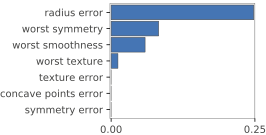

In [28]:
I = importances(cl, X_test, y_test)
plot_importances(I, color='#4575b4', vscale=1.4)

#### Visualization

In [29]:
!pip install dtreeviz

  Created wheel for dtreeviz: filename=dtreeviz-0.6-cp36-none-any.whl size=17767 sha256=6bd33fe09a2eeb51746e1deba6bd056ce687fb667f6fb8c6bd9ee58974b4c649
  Stored in directory: /root/.cache/pip/wheels/39/a3/1d/6b650e1dc7dee16d8385e11f4d6fff1d37e12f697d1dee5260
Successfully built dtreeviz


In [44]:
!apt-get install graphviz

Reading package lists... Done
Building dependency tree       
Reading state information... Done
graphviz is already the newest version (2.40.1-2).
0 upgraded, 0 newly installed, 0 to remove and 8 not upgraded.


In [0]:
from sklearn.datasets import *
from sklearn import tree
from dtreeviz.trees import *

In [0]:
viz = dtreeviz(cl,
                   df,
                   y,
                   target_name='cancer',
                   feature_names=features,
                   orientation="TD",
                   class_names=list(cancer.target_names),
                   fancy=True ,
                   label_fontsize=12,
                   ticks_fontsize=8,
                   fontname="Arial")

viz.view() 

In [49]:
from IPython.core.display import display, HTML
display(HTML(viz.svg()))